In [5]:
%cd Linear_Regression_house_price/

/content/Linear_Regression_house_price


In [7]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
# 让笔记全程输入稳定
np.random.seed(42)

# To plot pretty figures
# 导入绘图工具
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
# 设定图片保存路径，这里写了一个函数，后面直接调用即可
PROJECT_ROOT_DIR = os.path.abspath('.')   # 表示当前所处的文件夹的绝对路径
CHAPTER_ID = "Linear Regression"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
print(IMAGES_PATH)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
# 忽略无用警告
import warnings
#warnings.filterwarnings(action="ignore", message="^internal gelsd")
warnings.filterwarnings(action="ignore")

/content/Linear_Regression_house_price/images/Linear Regression


In [8]:
import numpy as np

X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)


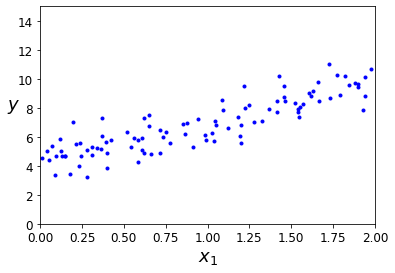

In [9]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [10]:
X_b=np.c_[np.ones((100,1)),X]  # add x0 = 1 to each instance，theta0*x0
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [11]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [12]:
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new] # add x0=1 to each instance，加偏置
print(X_new_b)
y_predict=X_new_b.dot(theta_best)
y_predict

[[1. 0.]
 [1. 2.]]


array([[4.21509616],
       [9.75532293]])

<function matplotlib.pyplot.show>

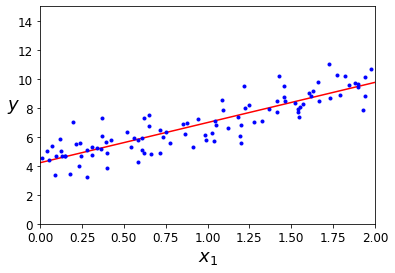

In [13]:
plt.plot(X_new,y_predict,"r-") #两点间连线
plt.plot(X,y,"b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])
plt.show

In [14]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [15]:
eta=0.1 # learning rate
n_iterations=1000
m=100
theta=np.random.randn(2,1) # random initialization

for interation in range(n_iterations):
    gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta-eta*gradients

In [16]:
theta

array([[4.21509616],
       [2.77011339]])

In [17]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

In [18]:
theta_path_bgd = []    #保存学习率为0.1的path，后续使用

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000    #iteration表示迭代循环次数
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

In [19]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

Saving figure gradient_descent_plot


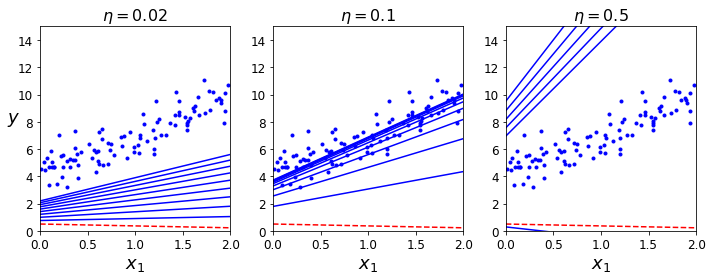

In [20]:
plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)

plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)

plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

In [21]:
theta_path_sgd = []
m = len(X_b)
print(m)
np.random.seed(42)

100


Saving figure sgd_plot


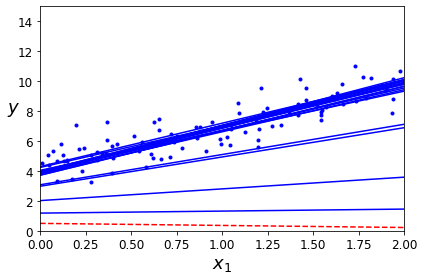

In [22]:
n_epochs=50    #epoch表示迭代循环次数
t0,t1=5,50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t+t1)

theta=np.random.randn(2,1)# randominitialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:               # not shown in the book
            y_predict = X_new_b.dot(theta)      # not shown
            style = "b-" if i > 0 else "r--"    # not shown
            plt.plot(X_new, y_predict, style)   # not shown
        random_index=np.random.randint(m)
        xi=X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m+i)
        theta=theta-eta*gradients
        theta_path_sgd.append(theta)                 # not shown
        
plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
save_fig("sgd_plot")                                 # not shown
plt.show()                                           # not shown

In [23]:
theta

array([[4.21076011],
       [2.74856079]])

In [24]:
from sklearn.linear_model import SGDRegressor

sgd_reg=SGDRegressor(max_iter=50,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None)

In [25]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.23868557]), array([2.82181634]))

In [26]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [27]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [28]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

Saving figure gradient_descent_paths_plot


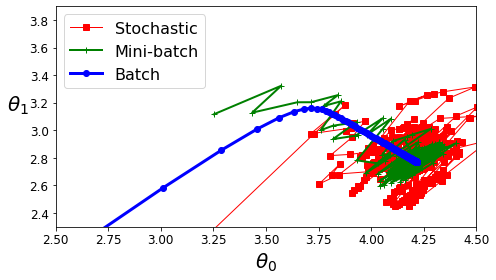

In [29]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

## 房价预测

In [30]:
from sklearn.datasets import load_boston

# 波士顿房价数据集已经内置在sklearn中
boston_house = load_boston()

boston_feature_name = boston_house.feature_names#数据集中特征的名称
boston_features = boston_house.data#数据集中的特征数据
boston_target = boston_house.target#数据集中的目标值（标签值）

boston_feature_name

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [31]:
# 来看一下对数据集的描述
print(boston_house.DESCR)
'''
有506条数据
13个预测变量
1个结果变量
'''

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

'\n有506条数据\n13个预测变量\n1个结果变量\n'

In [32]:
boston_features[:2,:]#查看一下前两个特征的值

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00]])

In [33]:
boston_target[:10]#看一下目标值的样子

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [34]:
# 进行训练集测试集切分
from sklearn.model_selection import  train_test_split
# 测试集的占比为30%，random_state= 0表示每次切分时，会得到一致的切分。
X_train,X_test,y_train,y_test = train_test_split(boston_features,boston_target,test_size = 0.3,random_state = 0)

In [35]:
#训练数据和测试数据标准化处理
from sklearn.preprocessing import StandardScaler
#分别初始化对特征值和目标值的标准化器
ss_X = StandardScaler()
ss_y = StandardScaler()
#训练数据都是数值型，所以要标准化处理
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)
#目标数据（房价预测值）也是数值型，所以也要标准化处理
#说明一下：fit_transform与transform都要求操作2D数据，而此时的y_train与y_test都是1D的，因此需要调用reshape(-1,1)，例如：[1,2,3]变成[[1],[2],[3]]
y_train = ss_y.fit_transform(y_train.reshape(-1,1))
y_test = ss_y.transform(y_test.reshape(-1,1))

#### 线性回归——正规方程

In [36]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [37]:
# 利用测试数据进行预测
y_pred = lin_reg.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
error = np.sqrt(mean_squared_error(y_test,y_pred))
error

0.5664286424765868

#### 线性回归——随机梯度下降

In [40]:
from sklearn.linear_model import SGDRegressor
#得到一致的结果
np.random.seed(42)
sgdr = SGDRegressor()
sgdr.fit(X_train,y_train)

SGDRegressor()

In [41]:
# 利用测试数据进行预测
y_pred = sgdr.predict(X_test)

In [42]:
error = np.sqrt(mean_squared_error(y_test,y_pred))
error

0.5820710178853562

#### 线性回归——批量随机梯度下降

### 加利福尼亚州房价预测 //作业？

In [76]:
DATASETS_PATH = os.path.join(PROJECT_ROOT_DIR, "datasets")
print(DATASETS_PATH)

/content/Linear_Regression_house_price/datasets


In [77]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#housing = fetch_california_housing()
housing = fetch_california_housing(data_home=DATASETS_PATH,download_if_missing=False)


#X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
#X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

# 进行训练集测试集切分
# 测试集的占比为30%，random_state= 0表示每次切分时，会得到一致的切分。
X_train,X_test,y_train,y_test = train_test_split(housing.data,housing.target,test_size = 0.3,random_state = 0)

#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_valid = scaler.transform(X_valid)
#X_test = scaler.transform(X_test)

In [78]:
#训练数据和测试数据标准化处理
#分别初始化对特征值和目标值的标准化器
ss_X = StandardScaler()
ss_y = StandardScaler()
#训练数据都是数值型，所以要标准化处理
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)
#目标数据（房价预测值）也是数值型，所以也要标准化处理
#说明一下：fit_transform与transform都要求操作2D数据，而此时的y_train与y_test都是1D的，因此需要调用reshape(-1,1)，例如：[1,2,3]变成[[1],[2],[3]]
y_train = ss_y.fit_transform(y_train.reshape(-1,1))
y_test = ss_y.transform(y_test.reshape(-1,1))

In [56]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [57]:
X_train.shape

(14448, 8)

#### 线性回归——正规方程

In [69]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [70]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.638849627697872

#### 线性回归——随机梯度下降

In [89]:
from sklearn.linear_model import SGDRegressor
#得到一致的结果
np.random.seed(49)
sgdr = SGDRegressor(eta0=0.001)
sgdr.fit(X_train,y_train)

SGDRegressor(eta0=0.001)

In [90]:
# 利用测试数据进行预测
y_pred = sgdr.predict(X_test)

In [91]:
housing_predictions = sgdr.predict(X_test)
sgdr_mse = mean_squared_error(y_test, housing_predictions)
sgdr_rmse = np.sqrt(sgdr_mse)
sgdr_rmse

0.6484728348309642

#### 线性回归——批量随机梯度下降